# Renthop Competition
## Data discovery

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading training and test set

In [2]:
df = pd.read_json('train.json')
df = df.set_index('listing_id')
testdf = pd.read_json('test.json')
testdf = testdf.set_index('listing_id')
columns = list(df.columns)

An example of the data we have

In [4]:
df.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address
listing_id,,,,,,,,,,,,,,
7211212,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
7150865,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
6887163,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street


In [8]:
print 'Columns: ' + str(columns)
df.describe()

Columns: [u'bathrooms', u'bedrooms', u'building_id', u'created', u'description', u'display_address', u'features', u'interest_level', u'latitude', u'longitude', u'manager_id', u'photos', u'price', u'street_address']


,bathrooms,bedrooms,latitude,longitude,price
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,0.000000,4.490000e+06


# Cleaning and transforming features

We have a number of feachures, categorical and numerical, etc. I am going to do some transformation in order to visualize the structure of the data.

First, I count the number of pictures present with the listing:

In [6]:
df['photo_cnt'] = df['photos'].apply(len)
testdf['photo_cnt'] = testdf['photos'].apply(len)

Creating features from the creation time of the listings, as # of days since posting, month and day of the date

In [5]:
df['created'] = pd.to_datetime(df['created'])
mindate = min(df['created'])
df['active'] = (df['created']-mindate).dt.days
df['month'] = df['created'].dt.month
df['day'] = df['created'].dt.day

testdf['created'] = pd.to_datetime(testdf['created'])
maxdate = max(testdf['created'])
testdf['active'] = (maxdate - testdf['created']).dt.days
testdf['month'] = testdf['created'].dt.month
testdf['day'] = testdf['created'].dt.day

Creating a feature from # of features

In [10]:
df['feature_cnt'] = df['features'].apply(len)
testdf['feature_cnt'] = testdf['features'].apply(len)

Some examples for the features

In [11]:
df['features'].head(5)

listing_id
7211212                                                   []
7150865    [Doorman, Elevator, Fitness Center, Cats Allow...
6887163    [Laundry In Building, Dishwasher, Hardwood Flo...
6888711                            [Hardwood Floors, No Fee]
6934781                                            [Pre-War]
Name: features, dtype: object

Parsing the outcome variable and assign numerical value to the categories

In [7]:
def parseInterest(interest):
    if interest == 'low':
        return 1
    elif interest == 'medium':
        return 2
    elif interest == 'high':
        return 3
        
df['interest_level'] = df['interest_level'].apply(parseInterest)


In [8]:
dflow = df[df['interest_level']==1]
dfmed = df[df['interest_level']==2]
dfhigh = df[df['interest_level']==3]

# Data Exploration

Distribution of the oucome variable

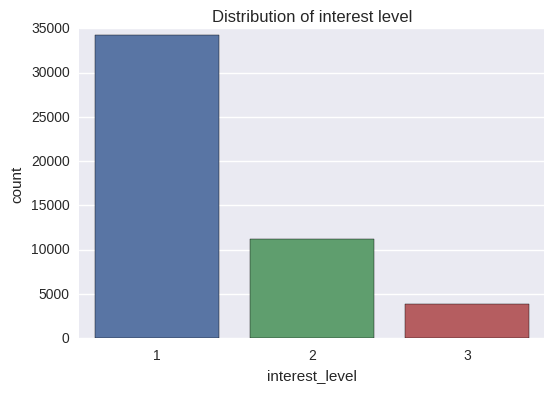

In [9]:
plt.figure
sns.countplot(x="interest_level", data=df)
plt.title('Distribution of interest level')

### Position
Visualizing the listings on a map

(-74.05, -73.85)

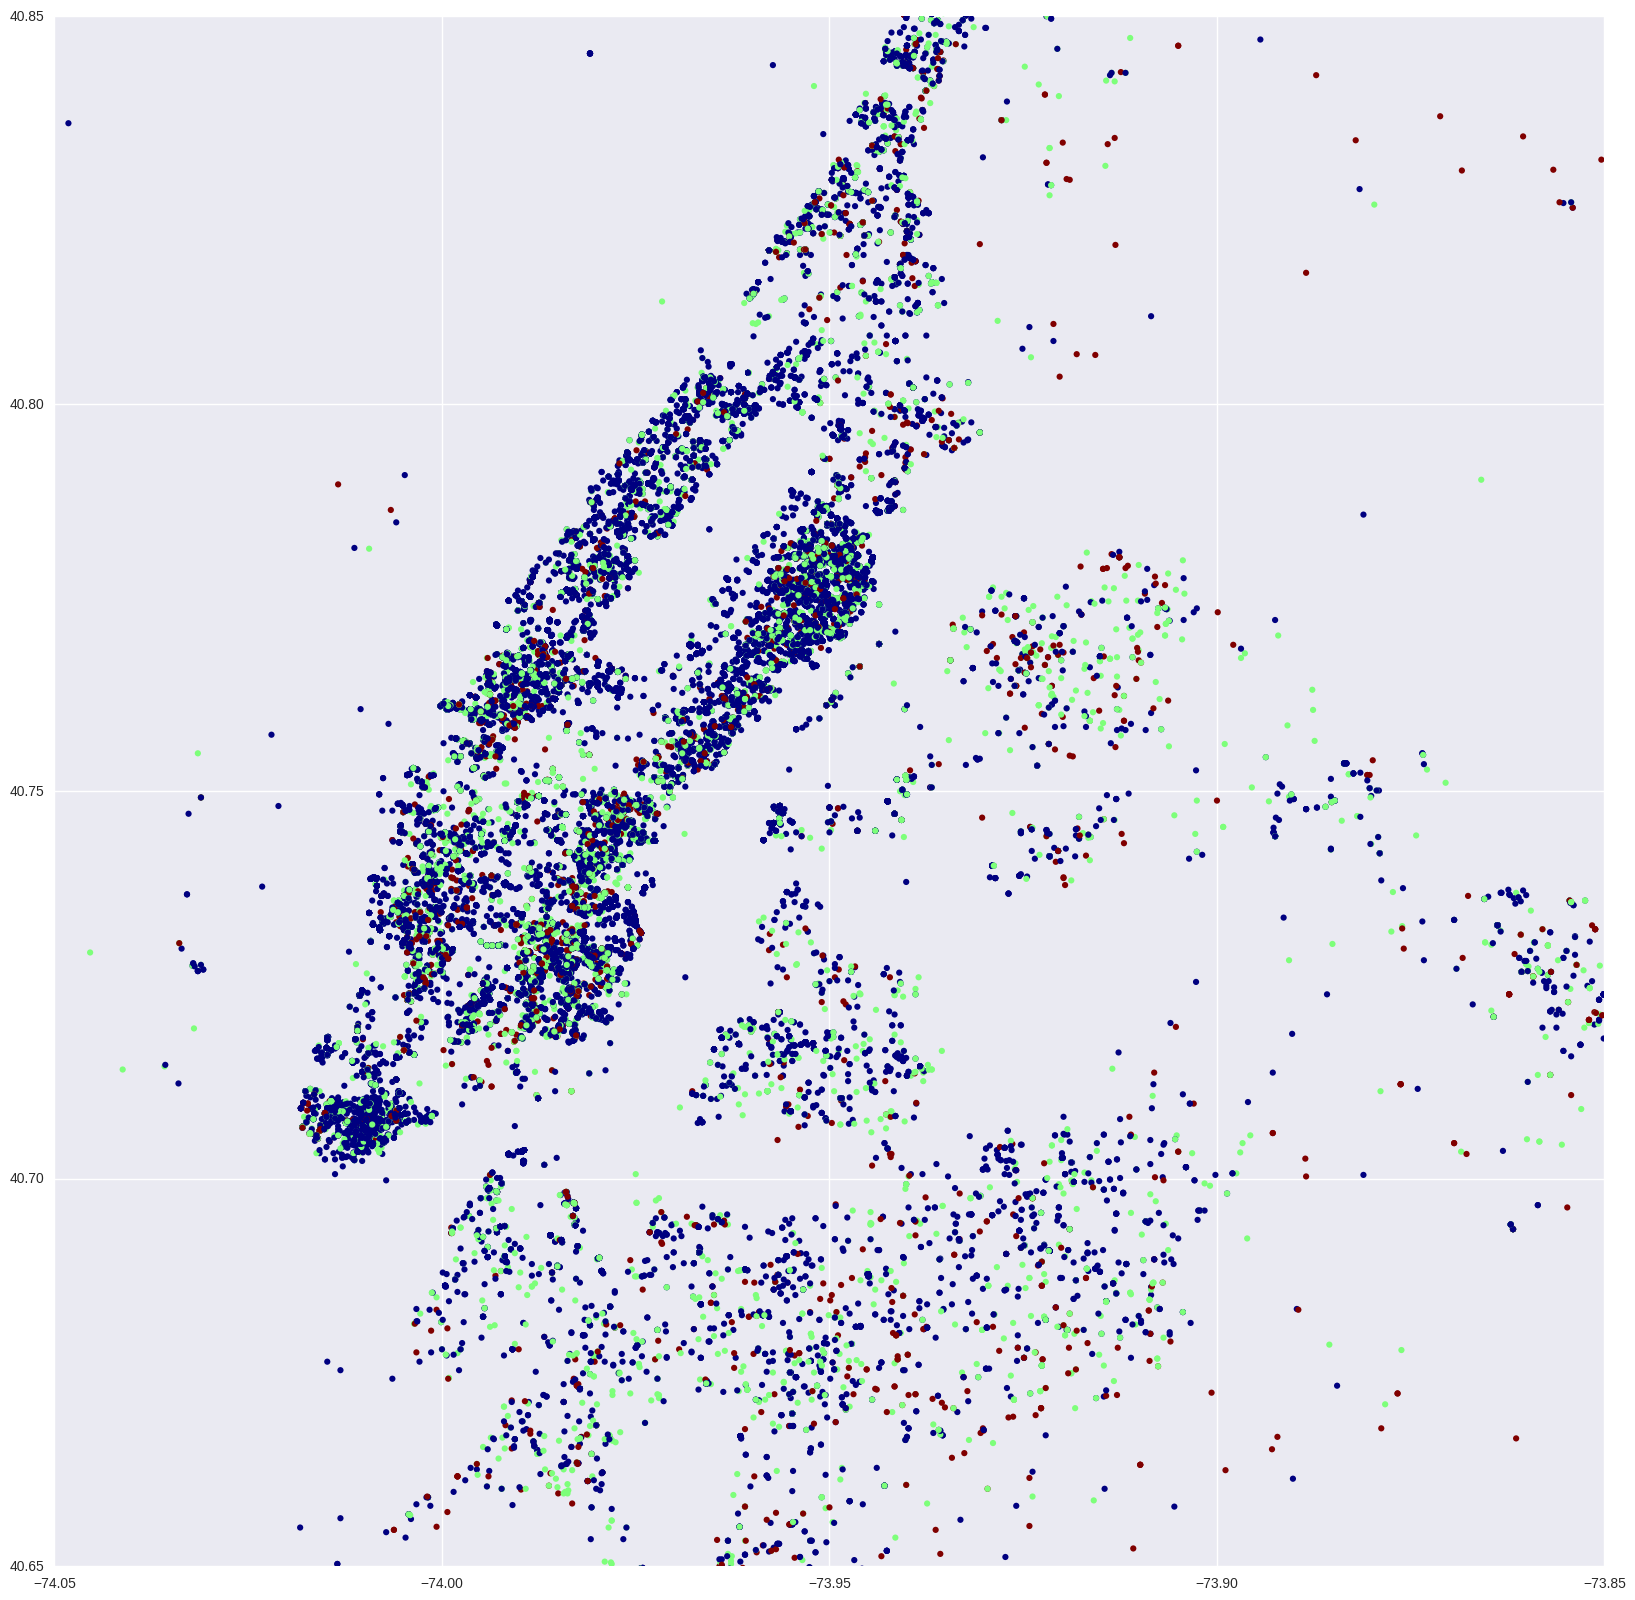

In [10]:
position = df[['latitude', 'longitude', 'price', 'interest_level']]
plt.figure(figsize=(20,20))
plt.scatter(position ['longitude'], position['latitude'], c=position['interest_level'], cmap = plt.cm.jet, linewidths=0, edgecolors=None)
plt.ylim(40.65,40.85)
plt.xlim(-74.05,-73.85)


# Distributions

Distribution of numerical values in the low, medium and high interest level apartmens

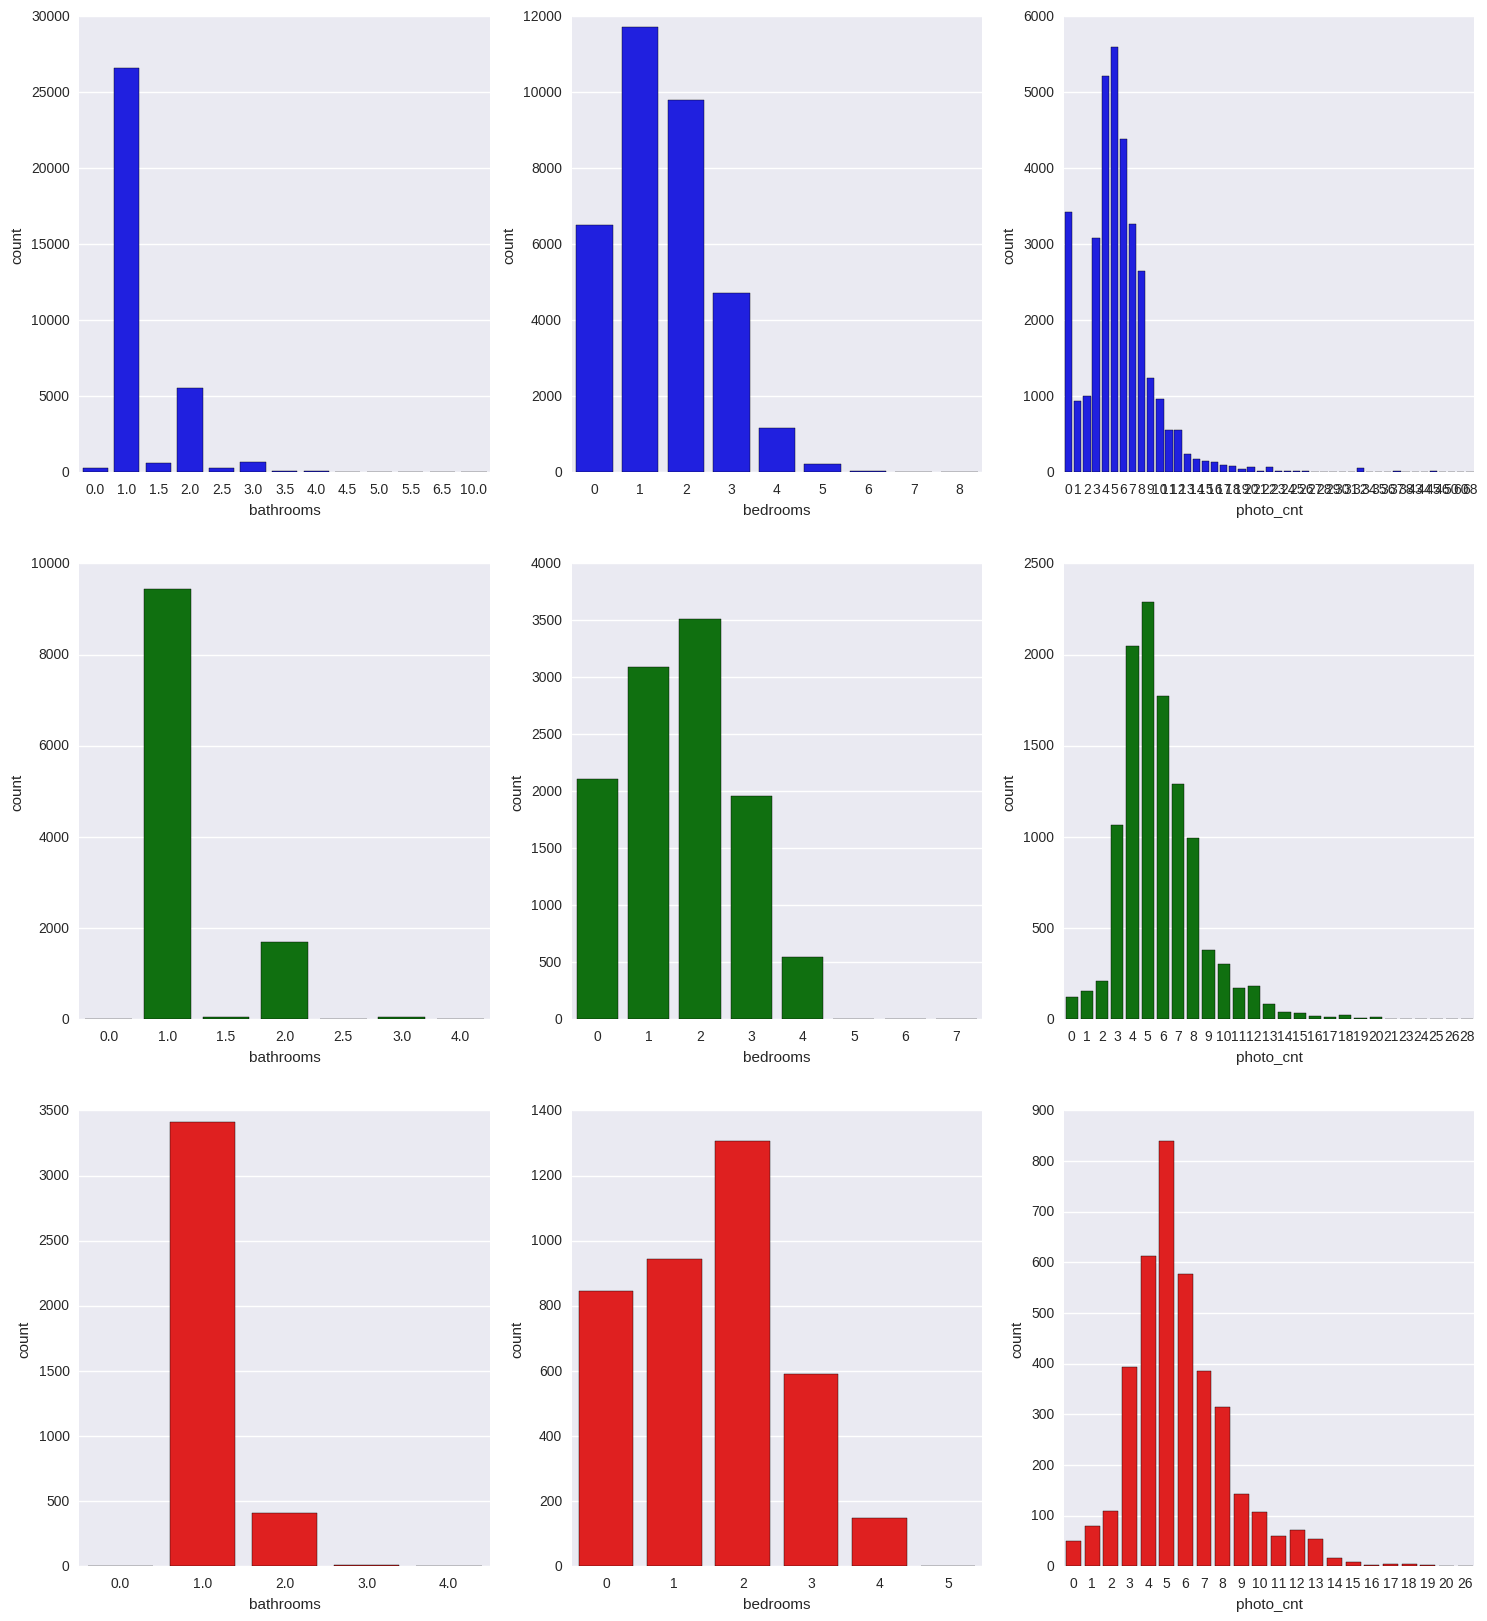

In [26]:
num_cols = ['bathrooms', 'bedrooms', 'photo_cnt']
f, axarr = plt.subplots(3,len(num_cols), sharex=False, figsize=(len(num_cols)*6,20))
for idx,i in enumerate(num_cols):
    sns.countplot(x=i, data=dflow, ax = axarr[0,idx], color = 'Blue', label='hi')
    sns.countplot(x=i, data=dfmed, ax = axarr[1,idx], color = 'Green')
    sns.countplot(x=i, data=dfhigh, ax = axarr[2,idx], color = 'Red')



It seemas as that in the high interest rate, 2 bedrooms are the most common while in the low interest rate 1 bedrooms dominate

"\nplt.figure()\nsns.distplot(testdf[testdf['price']<20000]['price'], bins = 30, kde=False,  color = 'Yellow')\nsns.distplot(df[df['price']<20000]['price'], bins = 30, kde=False,  color = 'Grey')\nplt.title('Distribution of interest rate vs price')\nplt.legend(['testddf', 'traindf'])\n\nplt.figure()\nsns.distplot(testdf[testdf['price']<7000]['price'], bins = 30, kde=False,  color = 'Yellow')\nsns.distplot(df[df['price']<7000]['price'], bins = 30, kde=False,  color = 'Grey')\nplt.title('Distribution of interest rate vs price')\nplt.legend(['testddf', 'traindf'])\n\n"

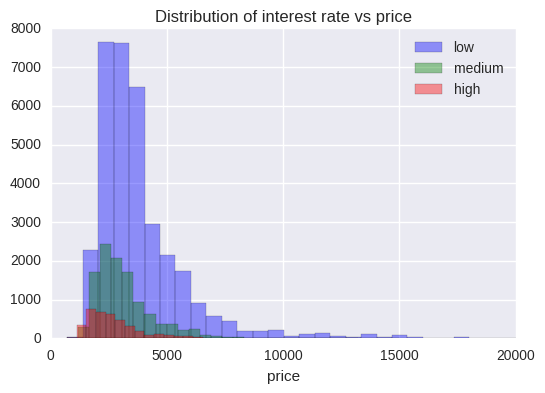

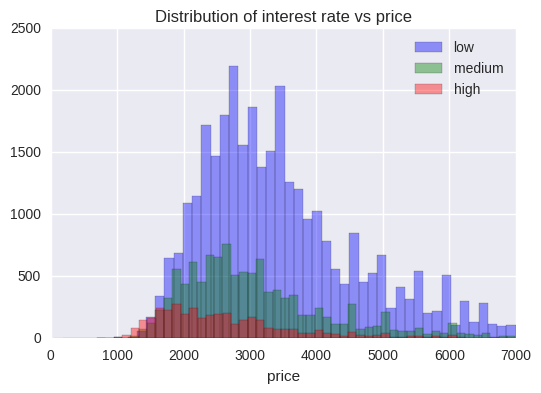

In [25]:
dflow = dflow[dflow['price']<20000]
dfmed = dfmed[dfmed['price']<20000]
dfhigh = dfhigh[dfhigh['price']<20000]
plt.figure()
sns.distplot(dflow['price'], bins = 30, kde=False,  color = 'Blue')
sns.distplot(dfmed['price'], bins = 30, kde=False,  color = 'Green')
sns.distplot(dfhigh['price'], bins = 30, kde=False,  color = 'Red')
plt.title('Distribution of interest rate vs price')
plt.legend(['low', 'medium', 'high'])

plt.figure()
maxprice = 7000
bins = 50
sns.distplot(dflow[dflow['price']<maxprice]['price'], bins = bins, kde=False,  color = 'Blue')
sns.distplot(dfmed[dfmed['price']<maxprice]['price'], bins = bins, kde=False,  color = 'Green')
sns.distplot(dfhigh[dfhigh['price']<maxprice]['price'], bins = bins, kde=False,  color = 'Red')
plt.title('Distribution of interest rate vs price')
plt.legend(['low', 'medium', 'high'])




The distribution over the prices doesnt show anything particularly interesting, however it seemes that the cheaper apartments have higher interest rate.

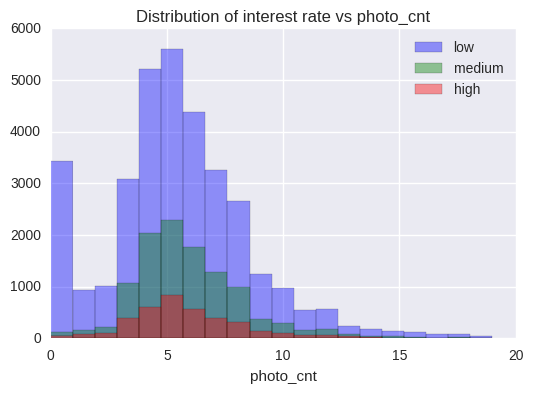

In [27]:
dflow = dflow[dflow['photo_cnt']<20]
dfmed = dfmed[dfmed['photo_cnt']<20]
dfhigh = dfhigh[dfhigh['photo_cnt']<20]
plt.figure()
sns.distplot(dflow['photo_cnt'], bins = 20, kde=False,  color = 'Blue')
sns.distplot(dfmed['photo_cnt'], bins = 20, kde=False,  color = 'Green')
sns.distplot(dfhigh['photo_cnt'], bins = 20, kde=False,  color = 'Red')
plt.title('Distribution of interest rate vs photo_cnt')
plt.legend(['low', 'medium', 'high'])


The lack of photos usually results with low interest level

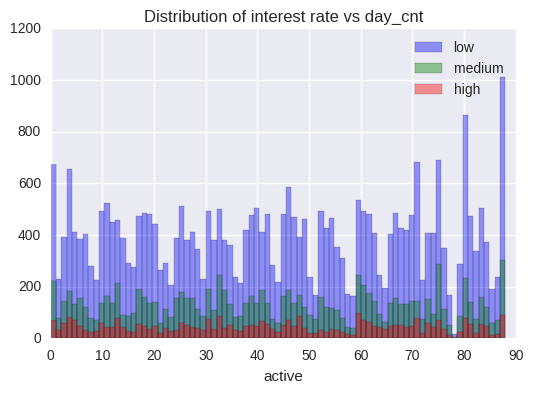

In [29]:
bins = 85
plt.figure()
sns.distplot(dflow['active'], bins = bins, kde=False,  color = 'Blue')
sns.distplot(dfmed['active'], bins = bins, kde=False,  color = 'Green')
sns.distplot(dfhigh['active'], bins = bins, kde=False,  color = 'Red')
plt.title('Distribution of interest rate vs day_cnt')
plt.legend(['low', 'medium', 'high'])